Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd #data processing...
import matplotlib.pyplot as plt #used to build graphs and visualisation..
import seaborn as sns #used for visualisation...
from sklearn.utils import resample #making each class have closely equal number of elements...#maintaining the class balance
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score #GridSearchCV used for Hyperparameters....combinations of various parameters...for large dataset use RandomSearchCV but for small Dataset use GridSerachCV... #cross_val_score is used to test whether model work better on multiple dataset....
from sklearn.ensemble import RandomForestClassifier #Machine learning Model used for this problem
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score #classfication_report is used for accuracy
import pickle #to store trained model for future use..


Data Collection and Preprocessing

In [3]:
#loading a dataset to pandas dataframe..
data=pd.read_csv('/content/Rainfall.csv')

In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
data.shape

(366, 12)

In [6]:
data.head() #first five rows of dataset...

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [7]:
data.tail() #last five rows of dataset...

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [9]:
print("data.Info:")
data.info()

data.Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [16]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
#remove extra space in all columns...
data.columns=data.columns.str.strip()

In [13]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [17]:
#remove the day column as it is not such importnat...
data=data.drop(columns="day")


In [18]:
print(data)

     pressure  maxtemp  temparature  mintemp  ...  rainfall  sunshine  winddirection windspeed
0      1025.9     19.9         18.3     16.8  ...       yes       9.3           80.0      26.3
1      1022.0     21.7         18.9     17.2  ...       yes       0.6           50.0      15.3
2      1019.7     20.3         19.3     18.0  ...       yes       0.0           40.0      14.2
3      1018.9     22.3         20.6     19.1  ...       yes       1.0           50.0      16.9
4      1015.9     21.3         20.7     20.2  ...       yes       0.0           40.0      13.7
..        ...      ...          ...      ...  ...       ...       ...            ...       ...
361    1022.7     18.8         17.7     16.9  ...       yes       0.0           30.0      18.4
362    1026.6     18.6         17.3     16.3  ...       yes       1.0           20.0      25.9
363    1025.9     18.9         17.7     16.4  ...       yes       4.6           70.0      33.4
364    1025.3     19.2         17.3     15.2  ... 

In [20]:
#checking the number of Missing values
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [22]:
#finding the unique values...
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [30]:
#handling the missing elements....
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0]) #repalcing the missing value with mode of that column...
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())   #repalcing the missing value with median of that column...

In [31]:
#checking the number of Missing values again after inserting mode and median value..
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


Changing the String value into numerical value.



In [32]:
data["rainfall"].unique() #type of unique value available in a particular column...

array(['yes', 'no'], dtype=object)

In [33]:
#converting yes and no into 1 and 0 respectively...
data["rainfall"]=data["rainfall"].map({"yes":1,"no":0})

In [36]:
data.head() #to see whether changes are applied or not...

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


**Exploratory Data Analysis**




In [38]:
data.shape

(366, 11)

In [39]:
# setting style for all the plots...
sns.set(style="whitegrid")

In [41]:
data.describe() #if the difference between median and mean is less then it means that it is a uniform distribution whereas if difference is large then it is skewwed distribution..

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [42]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

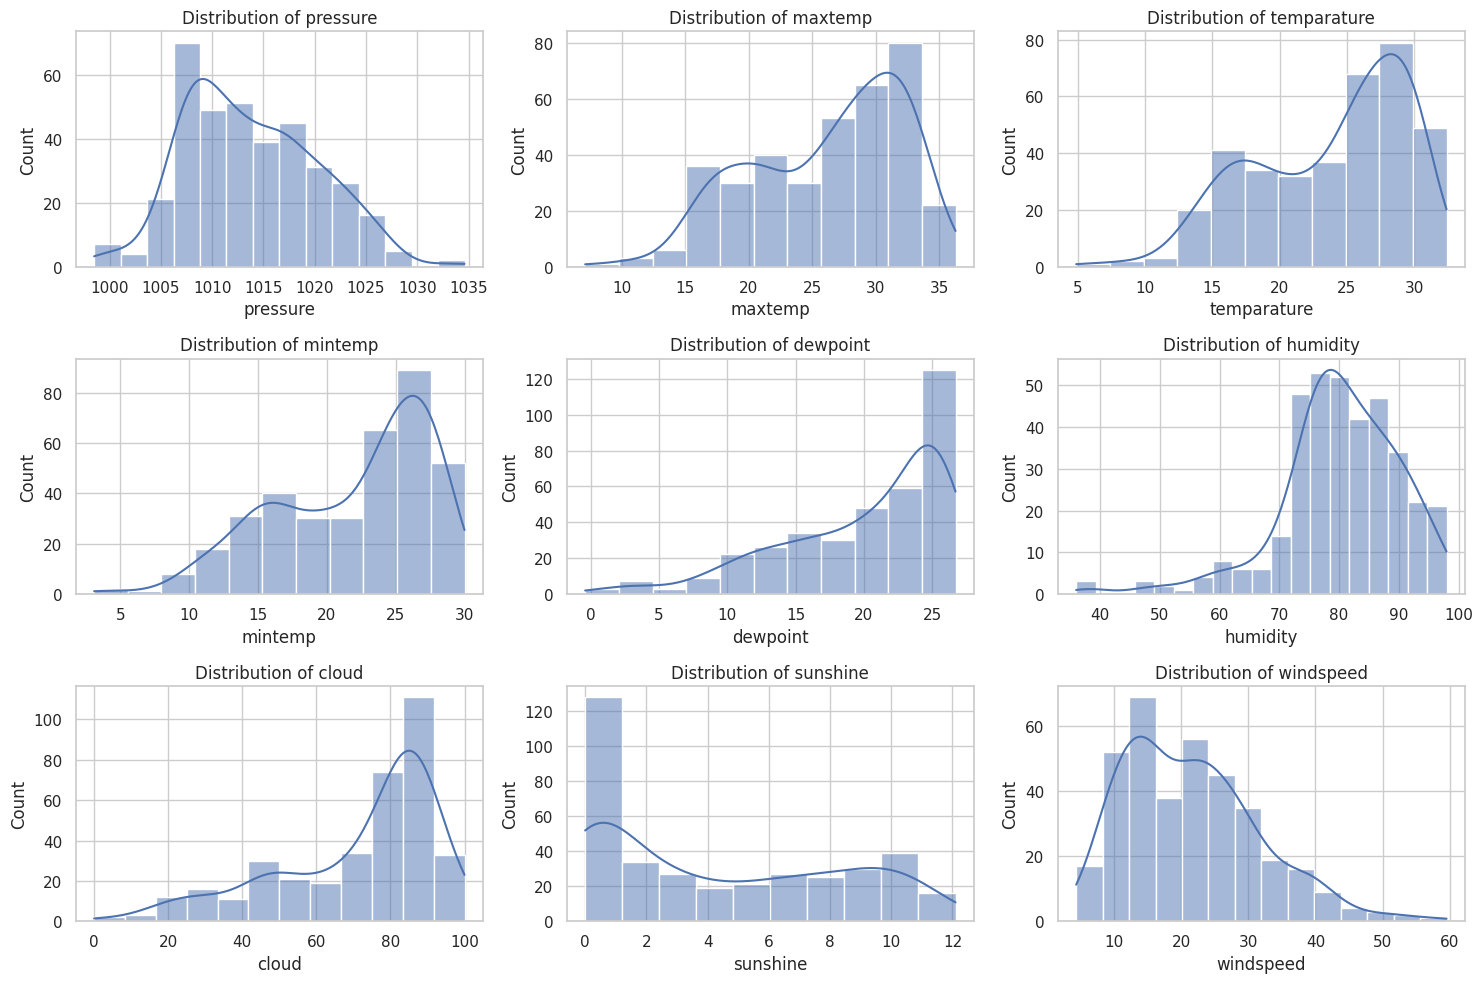

In [46]:
plt.figure(figsize=(15,10))

# Loop through columns and create subplots
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.histplot(data[column], kde=True)  # Plot histogram with KDE
    plt.title(f"Distribution of {column}")

# Adjust layout to avoid overlap and show all plots together
plt.tight_layout()
plt.show()


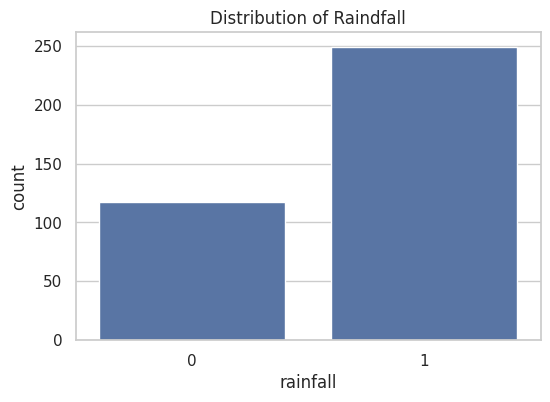

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("Distribution of Raindfall")
plt.show()
#shows imbalance in our dataset.... through down sampling...

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

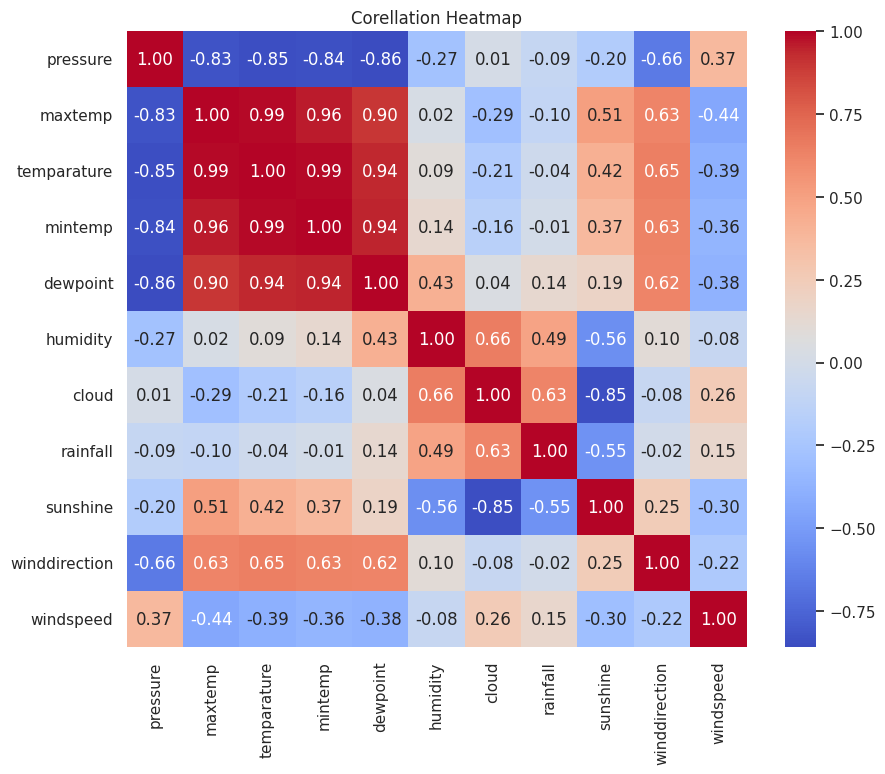

In [51]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Corellation Heatmap")
plt

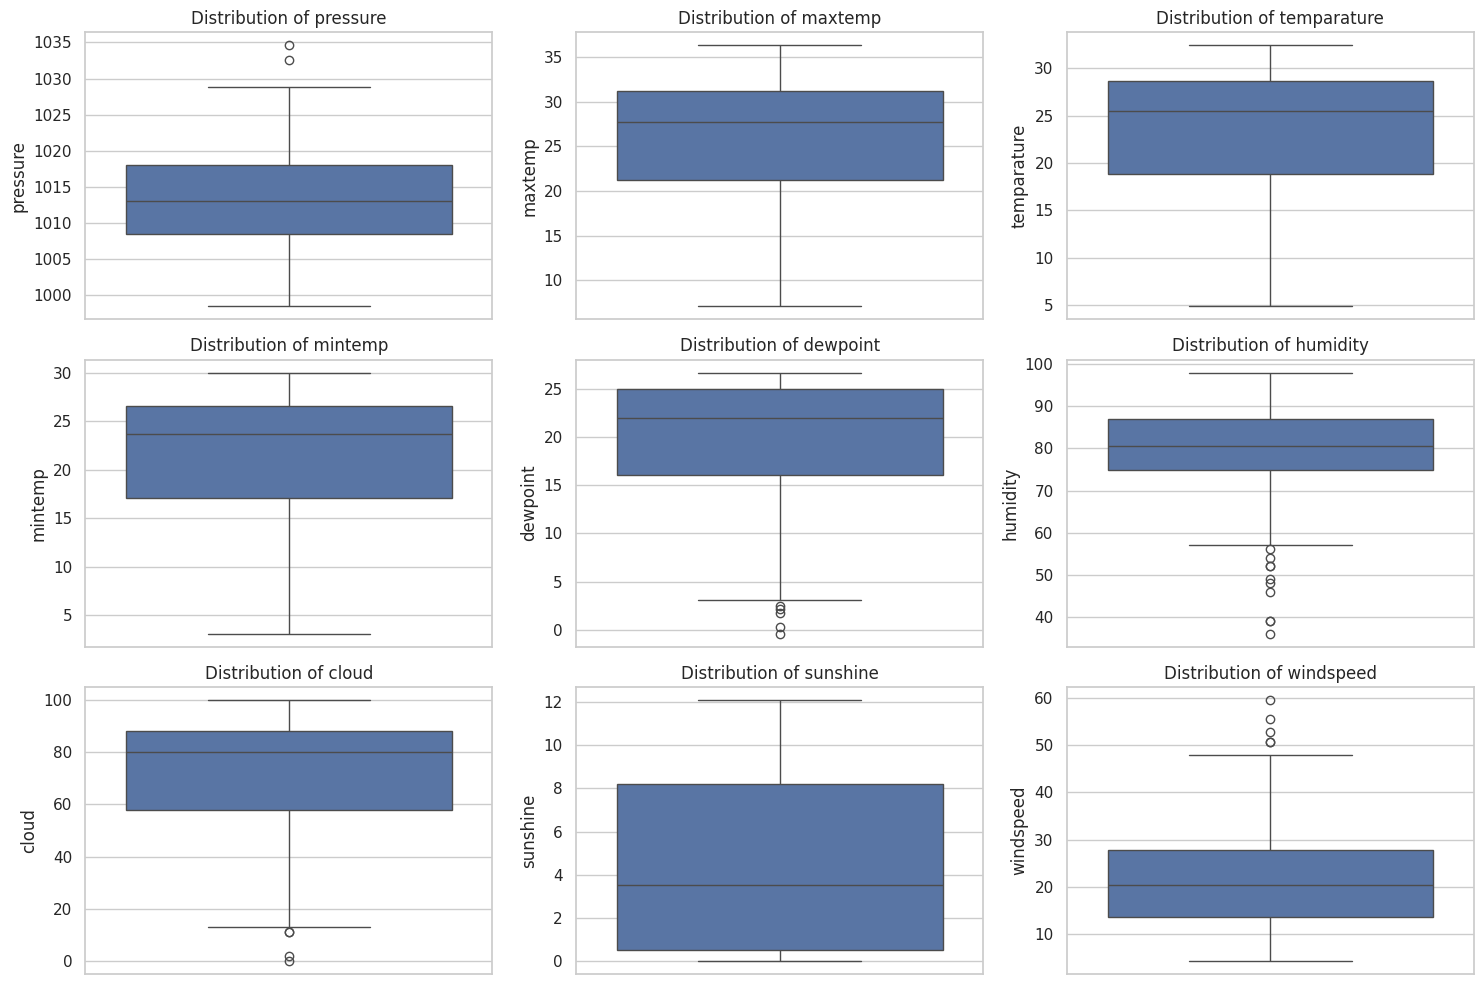

In [52]:
plt.figure(figsize=(15,10))

# Loop through columns and create subplots
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.boxplot(data[column])  # Plot histogram with KDE
    plt.title(f"Distribution of {column}")

# Adjust layout to avoid overlap and show all plots together
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [54]:
#drop higly correaled column... four column were higly correlated in figure hence we choosed one and removed other
data=data.drop(columns=['maxtemp', 'temparature','mintemp'])

In [55]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [56]:
data["rainfall"].value_counts()

,count
rainfall,
1,249
0,117


In [57]:
#seperate majority and minority class...
df_majority=data[data["rainfall"]==1]
df_minority=data[data["rainfall"]==0]

In [58]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [61]:
#downsample majority class to match minority count


df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42) #replace =false prevent insertion of duplicate value...

In [62]:
df_majority_downsampled.shape

(117, 8)

In [64]:
#concatenating both data
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [65]:
df_downsampled.shape

(234, 8)

In [ ]:
df.downsampled.head()

In [68]:
#shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [69]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [70]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


Splitting the data into traning and testing data

In [71]:
#split features and and target  as X and y
X=df_downsampled.drop(columns=["rainfall"])
y=df_downsampled["rainfall"]

In [72]:
print(X)
print(y)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]
0      1
1      0
2      0
3      1
4      0
      .

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
rf_model=RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],               # Control depth of trees
    'min_samples_split': [2, 5, 10],           # Correct parameter
    'min_samples_leaf': [1, 2, 4],             # Correct parameter
    'max_features': ['auto', 'sqrt'],          # Control number of features for splitting
    'bootstrap': [True, False]                 # Control bootstrap sampling
}



**Model Training**

In [81]:
#Hypertuning using GridSearchCV
grid_search_rf=GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [82]:
best_rf_model=grid_search_rf.best_estimator_
print("best parameters for Random Forest:",grid_search_rf.best_estimator_)

best parameters for Random Forest: RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)


**Model Evaluation**

In [86]:
cv_scores=cross_val_score(best_rf_model,X_train,y_train,cv=5)
print("Cross validation scores:",cv_scores)
print("Mean cross validation score:",np.mean(cv_scores))

Cross validation scores: [0.71052632 0.78947368 0.83783784 0.81081081 0.91891892]
Mean cross validation score: 0.8135135135135135


In [87]:
#test set performance
y_prediction=best_rf_model.predict(X_test)

print("Test set Accuracy:",accuracy_score(y_test,y_prediction))
print("Test set Confusion matrix:\n",confusion_matrix(y_test,y_prediction))
print("Classification Report:\n",classification_report(y_test,y_prediction))


Test set Accuracy: 0.7446808510638298
Test set Confusion matrix:
 [[16  8]
 [ 4 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.70      0.83      0.76        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



Prediction on unknown data


In [88]:
X_train.columns


Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [95]:
input_data={1015.5,19.9,95,81,0.0,40.0,13.7}
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])



In [92]:
prediction=best_rf_model.predict(input_df)


In [93]:
print(prediction)

[0]


In [96]:
prediction=best_rf_model.predict(input_df)
print("Result:","Rainfall" if prediction[0]==1 else "No Rainfall")

Result: Rainfall


In [97]:
#save model and feature names im=n a pickle file

model_data={"model":best_rf_model,"Feature_names":X.columns.tolist()}

with open("minemodel.pkl","wb") as file:
  pickle.dump(model_data,file)

Load the model that has been Built


In [100]:
import pickle
import pandas as pd

In [105]:


# Load the trained model and features from the pickle file
with open("minemodel.pkl", "rb") as file:
    model_data = pickle.load(file)



In [112]:
input_data={1015.5,19.9,95,81,0.0,40.0,13.7}
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

In [113]:
prediction=best_rf_model.predict(input_df)
print("Result:","Rainfall" if prediction[0]==1 else "No Rainfall")

Result: Rainfall
